<div style="font-size: 18pt;">- Estimate linear regression model for Boston dataset</div><br/>


# Tasks: 
1. Choose five independent variables from features (X dataframe)
2. State what sign of estimated parameters do you expect and why
3. Estimate a linear regression, with house prices as dependent variable (y)
4. Comment on R2 and statistical significance of estimated parameters
5. Comment on whether your sign expectations (see 2 above) were correct.

In [1]:
from sklearn import datasets
import pandas as pd
import statsmodels.api as sm

In [2]:
boston = datasets.load_boston()
pd.DataFrame( boston.data, columns=boston.feature_names ).head()

/home/olek/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names) 

In [5]:
y = pd.DataFrame(boston.target, columns=['Price']) 

In [6]:
X.shape, y.shape

((506, 13), (506, 1))

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


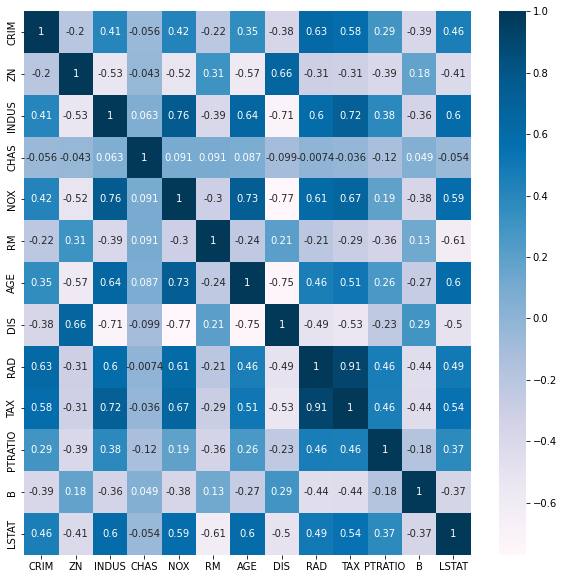

In [10]:
#check for multicollinearity, which independent variables (factors) you cannot use together in 
#the model
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [11]:
#select independent variables, i.e. columns in X dataframe
X = X[['RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']]

In [12]:
#check the result with head method
X.head()

,RM,DIS,TAX,PTRATIO,LSTAT
0,6.575,4.0900,296.0,15.3,4.98
1,6.421,4.9671,242.0,17.8,9.14
2,7.185,4.9671,242.0,17.8,4.03
3,6.998,6.0622,222.0,18.7,2.94
4,7.147,6.0622,222.0,18.7,5.33


In [13]:
#add constant to X
X = sm.add_constant(X)

In [14]:
X.head()

,const,RM,DIS,TAX,PTRATIO,LSTAT
0,1.0,6.575,4.0900,296.0,15.3,4.98
1,1.0,6.421,4.9671,242.0,17.8,9.14
2,1.0,7.185,4.9671,242.0,17.8,4.03
3,1.0,6.998,6.0622,222.0,18.7,2.94
4,1.0,7.147,6.0622,222.0,18.7,5.33


In [15]:
#define and fit the model, use sm library
mod = sm.OLS(y, X)
result = mod.fit()

In [16]:
#print the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          9.63e-127
Time:                        22:17:11   Log-Likelihood:                -1539.0
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3115.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7905      4.051      5.873      0.000      15.831      31.750
RM             4.3235      0.422     10.254      0.000       3.495       5.152
DIS           -0.6957      0.135     -5.173      0.000      -0.960      -0.431
TAX           -0.0056      0.002     -3.042      0.002      -0.009      -0.002
PTRATIO       -0.8468      0.122     -6.917      0.000      -1.087      -0.606
LSTAT         -0.6234      0.048    -12.883      0.000      -0.718      -0.528
==============================================================================
Omnibus:                      195.961   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.025
Skew:                           1.644   Prob(JB):                    1.55e-213
Kurtosis:                       8.972   Cond. No.                     7.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""